In [1]:
import pandas as pd
filename = 'gcoos_2019-10-29.csv'
df = pd.read_csv(filename)

QC Flags

 
The QC flag is composed of 8 digits that correspond to the following QC test performed:
```
Test                 Definition
timing/gap test      measured and received within the expected time window.
syntax test          data stream is structured properly.
location test        check for reasonable geographic location.
gross range test     data point exceeds sensor or operator selected range.
climatology test     data point falls within seasonal expectations.
spike test           data point  exceeds a selected threshold relative to adjacent data points.
rate of change test  excessive rise or fall.
flatline test        test for invariant value.
```

In [9]:
df.columns

Index(['owner', 'platform', 'lat', 'lon', 'depth', 'DO', 'qcFlag '], dtype='object')

In [36]:
df['qcFlag']

KeyError: 'qcFlag'

In [22]:
dn = df[df['depth'] == 1]

In [3]:
# Re-index by time
df = df.set_index(df['observationDate'])
# drop time columns
df = df.drop('observationDate',axis=1)

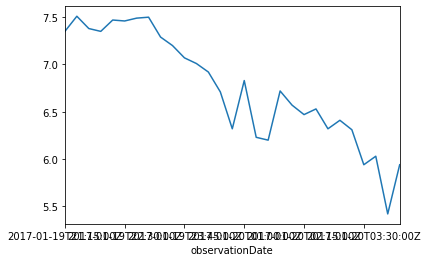

In [33]:
df['DO'][1:30].plot()

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(2, 2, 1)
for x in [1,2,3,4]:
    col_name = df.columns[x]
    colors_i = ['b' if flag==True else 'r' for flag in df[col_name]]
    plt.subplot(2, 2, x)
    plt.scatter(df.index,df['ctdmo_seawater_pressure'], color=colors_i)
    plt.title(df.columns[x])